<a href="https://colab.research.google.com/github/AyushChaturvedi09/Ayush/blob/main/House_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import all Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Uploading Dataset

-Data set https://drive.google.com/file/d/1GTHl46Wly65FCFj0YTfWP7Yit8W4DCNz/view



In [2]:
from google.colab import files
uploaded =files.upload()

Saving Housing.csv to Housing (1).csv


##READ Data

In [3]:
housing_data = pd.read_csv('Housing.csv')
print(housing_data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


## Perform Data Preprocessing


In [4]:
missing_values = housing_data.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


To Drop the missing values we use
dropna()

In [5]:
binary_columns = ['mainroad', 'guestroom' , 'basement','hotwaterheating','airconditioning','prefarea']
binary_mapping = {'yes': 1, 'no': 0}

for column in binary_columns:
  housing_data[column] = housing_data[column].map(binary_mapping)

furnishing_status_mapping = {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}
housing_data['furnishingstatus'] = housing_data['furnishingstatus'].map(furnishing_status_mapping)

In [6]:
print(housing_data.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 2  
1                 2  
2                 1  
3                 2  
4                 2  


##Visualising relationships between features and price


Text(0.5, 1.0, 'Mainroad vs Price')

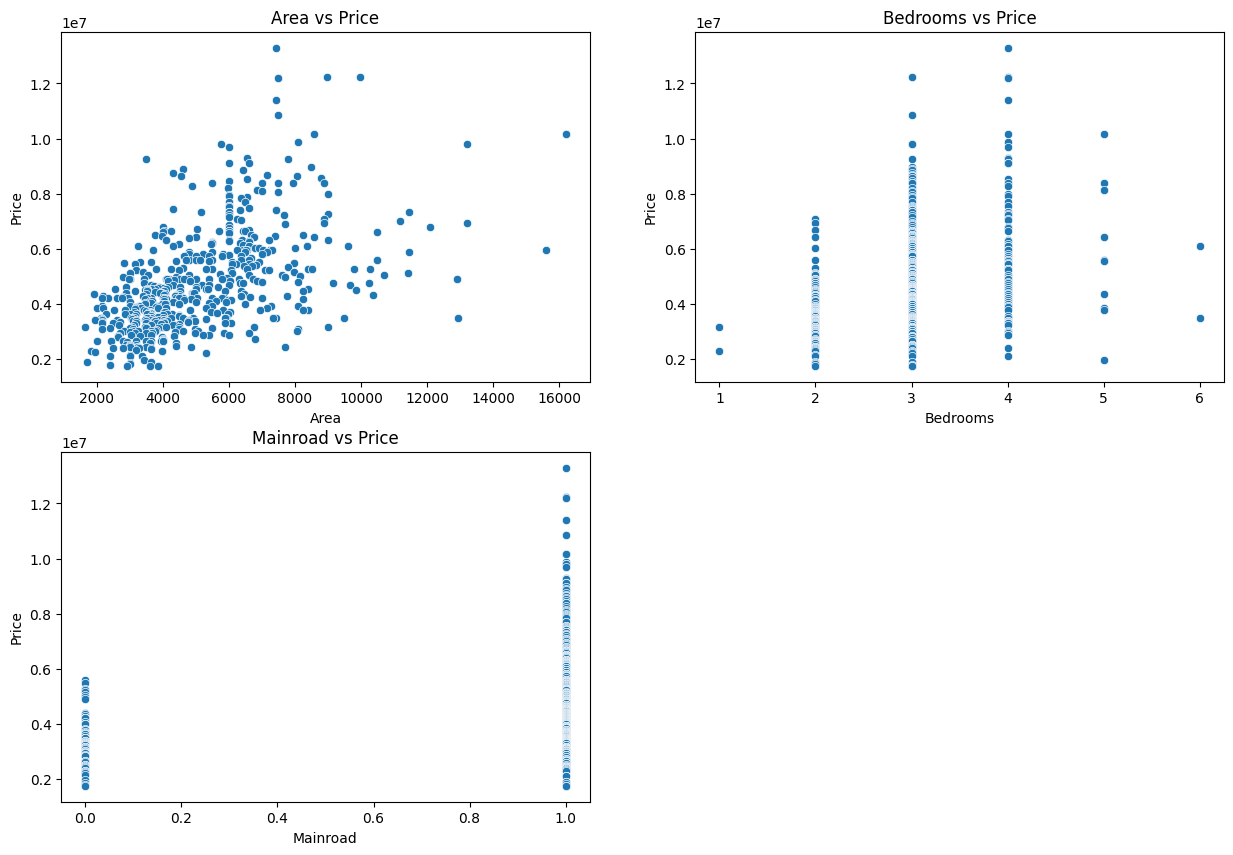

In [9]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.scatterplot(x='area',y='price',data=housing_data)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')

plt.subplot(2,2,2)
sns.scatterplot(x='bedrooms',y='price',data=housing_data)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')

plt.subplot(2,2,3)
sns.scatterplot(x='mainroad',y='price',data=housing_data)
plt.xlabel('Mainroad')
plt.ylabel('Price')
plt.title('Mainroad vs Price')

## Splitting data into training and testing
Model Selection (Linear Regresion model)

In [11]:
X = housing_data.drop('price', axis=1) #dropping because proce is dependent variable
y = housing_data['price'] #making another column for proce for predicting the price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#test_size is from 0 to 1 , 0.2 means 20% data is used as testing and rest 80% to train data
#random_state devides the testing data into diffrent combinations into which we can test the data

## Applying the Algorithm

In [19]:
model = LinearRegression() #Training the Model
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test) #Testing the data

## Evaluation Metrices

- Mean Squared Error - How wrong the model is on average , it squares and subtracts the predicted value with actual value , square is done to make sure no negitives
- R Squared (R^2) - How well model explains the data , value of R^2 is 0 to 1 , if value is 1 that perfect model , if value is 0 it is terrible model

In [21]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:',mse)
print('R^2',r2)

Mean Squared Error: 1771751116594.0352
R^2 0.6494754192267803


As Prediction Alog is ok we will be using another Regression Algorithm
## Using Random Forest Algorithm

In [16]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42) #n_estimators- number of sub trees (Decision trees)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
y_rf_pred = model_rf.predict(X_test)

In [18]:
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print('Mean Squared Error:',mse_rf)
print('R^2',r2_rf)

Mean Squared Error: 1956925181711.5183
R^2 0.612840442148196


Liner Regression was predicting better hence will not use Random forest

## Predicting Price of a House

In [26]:
#Example

new_house = pd.DataFrame({
    'area': [3000],
    'bedrooms': [5],
    'bathrooms': [3],
    'stories': [4],
    'mainroad': [1],
    'guestroom': [1],
    'basement': [0],
    'hotwaterheating': [0],
    'airconditioning': [1],
    'parking': [1],
    'prefarea': [1],
    'furnishingstatus': [2]
})

#make prediction

predicted_price = model.predict(new_house)
print('Predicted Price:', predicted_price[0])

Predicted Price: 8550926.01488515
